In [20]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Funcion que utilizaremos

In [21]:
class GeneticAlgotithm:
  def __init__(self, sizePoblation, generations, indSize, geneticPool, prob) -> None:
    self.sizePoblation = sizePoblation
    self.generations = generations
    self.indSize = indSize
    self.geneticPool = geneticPool
    self.prob = prob

  def fx(self, x):
    #return -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2
    return math.sin(x)


  def initializePopulation(self):
    y_axis = []
    x_axis = np.arange(0,2,0.02)

    for num in x_axis:
      y_axis.append(self.fx(num))

      plt.plot(x_axis, y_axis)
      return x_axis, y_axis


  def listToDecimal(self,num):
    decimal = 0
    for i in range(len(num)):
      decimal += num[i]*10**(-i)
    return decimal
  

  def initializePopulation2(self):
    poblation = []

    for i in range(self.sizePoblation):
      individual = []
      individual += [np.random.choice(self.geneticPool[0])]
      individual += list(np.random.choice(self.geneticPool[1], self.indSize - 1))
      poblation.append(individual)
    return poblation


  def fitness(self, poblation):
    fitness = []

    for individual in poblation:
      x = self.listToDecimal(individual)
      y = self.fx(x)
      fitness += [y]

    fitness = np.array(fitness)
    fitness = fitness / fitness.sum()
    return fitness
  

  def crossover(self, poblation, fitness):
    sizePoblation = len(poblation)
    offspring = []

    for i in range(sizePoblation//2):
      print(fitness)
      parents = np.random.choice(sizePoblation, 2, p=fitness)
      print(parents)
      cross_point = np.random.randint(self.indSize)
      offspring += [poblation[parents[0]][:cross_point] + poblation[parents[1]][cross_point:]]
      offspring += [poblation[parents[1]][:cross_point] + poblation[parents[0]][cross_point:]]
    
    for individual in offspring:
      x = self.listToDecimal(individual)
      y = self.fx(x)
      #plt.plot(x, y, 'x')
    #plt.plot(valuesX, valuesY)
    return offspring


  def mutate(self, individuals):
    for i in range(len(individuals)):
      mutateIndividual = individuals[i]
      if (np.random.random() < self.prob):
        mutation = np.random.choice(self.geneticPool[0])
        mutateIndividual = [mutation] + mutateIndividual[1:]

      for j in range(1, len(mutateIndividual)):
        if (np.random.random() < self.prob):
          mutatation = np.random.choice(self.geneticPool[1]) 
          mutateIndividual = mutateIndividual[0:j] + [mutatation] + mutateIndividual[j+1:]
      individuals[i] = mutateIndividual
    return individuals

  def evolvePopulation(self):
    valuesX, valuesY = self.initializePopulation()
    initialValues = self.initializePopulation2()

    for _ in range(self.generations):
      fitness = []
      fitness = self.fitness(initialValues)
      offspring = self.crossover(initialValues, fitness)
      initialValues = self.mutate(offspring)
      #initialValues = offspring

  # Visualizar la última generación
    final_fitness = self.fitness(initialValues)
    plt.figure()
    plt.plot(valuesX, valuesY, label='Función objetivo')
    for individual in initialValues:
        x = self.listToDecimal(individual)
        y = self.fx(x)
        plt.plot(x, y, 'x', color='red')
    plt.legend()
    plt.title('Última Generación')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
      


# ola = GeneticAlgotithm(100, 10, 10, [[0,1],[0,1,2,3,4,5,6,7,8,9]], 0.005)


# valuesX, valuesY = ola.initializePopulation()

# initialValues = ola.initializePopulation2()

# yPoblation  = ola.fitness(initialValues)

# cruces = ola.crossover(initialValues, yPoblation, valuesX, valuesY)

# mutacion = ola.mutate(initialValues)





[0.13906839 0.12946002 0.09996291 0.05721423 0.05798913 0.13726332
 0.1327744  0.11142334 0.09305497 0.04178929]
[4 5]
[0.13906839 0.12946002 0.09996291 0.05721423 0.05798913 0.13726332
 0.1327744  0.11142334 0.09305497 0.04178929]
[2 7]
[0.13906839 0.12946002 0.09996291 0.05721423 0.05798913 0.13726332
 0.1327744  0.11142334 0.09305497 0.04178929]
[0 0]
[0.13906839 0.12946002 0.09996291 0.05721423 0.05798913 0.13726332
 0.1327744  0.11142334 0.09305497 0.04178929]
[1 6]
[0.13906839 0.12946002 0.09996291 0.05721423 0.05798913 0.13726332
 0.1327744  0.11142334 0.09305497 0.04178929]
[0 2]


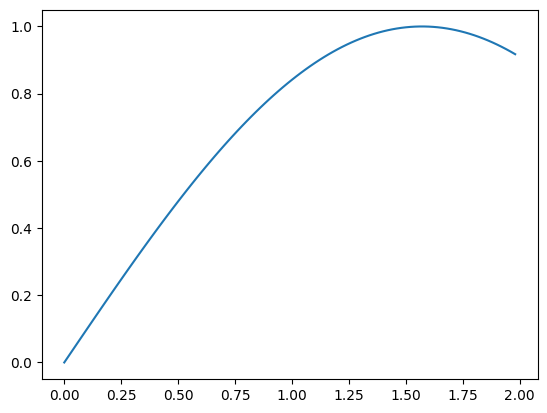

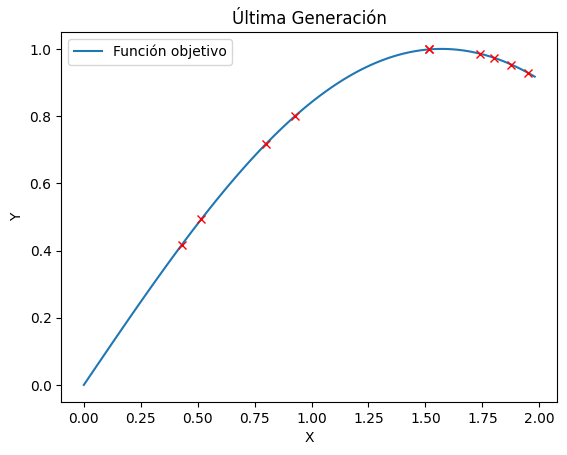

In [22]:
ola = GeneticAlgotithm(10, 1, 10, [[0, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], 0.005)
ola.evolvePopulation()

In [23]:
import numpy as np
import random

class GeneticAlgorithmScheduler:
    def __init__(self, courses, rooms, timeslots, population_size, generations, mutation_probability):
        self.courses = courses
        self.rooms = rooms
        self.timeslots = timeslots
        self.population_size = population_size
        self.generations = generations
        self.mutation_probability = mutation_probability

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            schedule = self.create_schedule()
            population.append(schedule)
        return population

    def create_schedule(self):
        schedule = {}
        for course in self.courses:
            room = random.choice(self.rooms)
            timeslot = random.choice(self.timeslots)
            schedule[course] = {'room': room, 'timeslot': timeslot}
        return schedule

    def fitness(self, schedule):
        # Esta función de fitness podría ser mejorada según los requisitos específicos del problema.
        # Por ahora, simplemente devuelve un valor aleatorio.
        return random.uniform(0, 1)

    def crossover(self, parent1, parent2):
        crossover_point = random.randint(1, len(self.courses) - 1)
        child = {}
        for i in range(crossover_point):
            course = self.courses[i]
            child[course] = parent1[course]
        for i in range(crossover_point, len(self.courses)):
            course = self.courses[i]
            child[course] = parent2[course]
        return child

    def mutate(self, schedule):
        for course in self.courses:
            if random.random() < self.mutation_probability:
                schedule[course]['room'] = random.choice(self.rooms)
                schedule[course]['timeslot'] = random.choice(self.timeslots)
        return schedule

    def evolve_population(self, population):
        for _ in range(self.generations):
            population.sort(key=lambda x: self.fitness(x), reverse=True)
            new_population = [population[0]]  # Elitismo: conservar al mejor individuo de la generación anterior

            while len(new_population) < self.population_size:
                parent1, parent2 = random.sample(population, 2)
                child = self.crossover(parent1, parent2)
                child = self.mutate(child)
                new_population.append(child)

            population = new_population

        best_schedule = max(population, key=lambda x: self.fitness(x))
        return best_schedule

# Ejemplo de uso
courses = ['Math', 'Physics', 'Chemistry', 'Biology', 'History', 'Spanish', 'Lab']
rooms = ['Room1', 'Room2', 'Room3']
timeslots = ['9:00-10:30', '11:00-12:30']

population_size = 50
generations = 100
mutation_probability = 0.1

scheduler = GeneticAlgorithmScheduler(courses, rooms, timeslots, population_size, generations, mutation_probability)
initial_population = scheduler.initialize_population()
best_schedule = scheduler.evolve_population(initial_population)

print("Mejor horario encontrado:")
for course, details in best_schedule.items():
    print(f"{course}: {details['room']} - {details['timeslot']}")


Mejor horario encontrado:
Math: Room1 - 9:00-10:30
Physics: Room2 - 9:00-10:30
Chemistry: Room2 - 9:00-10:30
Biology: Room2 - 11:00-12:30
History: Room3 - 11:00-12:30
Spanish: Room2 - 9:00-10:30
Lab: Room2 - 9:00-10:30


In [24]:
import numpy as np
import math

# Definir las funciones
def f1(x):
    #return -(0.1 + (1 - x)**2 - 0.1 * math.cos(6 * math.pi * (1 - x))) + 2
    return  math.cos(x)

def f2(x):
    return math.sin(x)

# Definir el dominio (rango de valores de x)
x_values = np.linspace(0, 2, 100)  # Cambia los valores según tu dominio

# Calcular los valores de las funciones en los puntos del dominio
y1_values = np.array([f1(x) for x in x_values])
y2_values = np.array([f2(x) for x in x_values])

# Calcular el Error Cuadrático Medio (MSE)
mse = np.mean((y1_values - y2_values)**2)

print("Error Cuadrático Medio:", mse)


Error Cuadrático Medio: 0.5945628960641468
